In [15]:
import sys
sys.path.append('../src')  # Add src/ to module path
from data_fetch import fetch_yfinance_data, save_raw_data
from preprocessing import load_and_clean
from eda import plot_closing_price, plot_volatility, decompose_series

In [16]:
# Fetch raw data
tickers = ['TSLA', 'BND', 'SPY']
print("Fetching raw data...")
raw_data = fetch_yfinance_data(tickers)
save_raw_data(raw_data)

Fetching raw data...
Raw data saved to data/raw


In [17]:
# Preprocess data
# Clean the raw data by interpolating missing values and adding daily returns
print("\nPreprocessing data...")
cleaned_data = load_and_clean(tickers)
for ticker in tickers:
    print(f'\n{ticker} Sample:\n', cleaned_data[ticker].head())


Preprocessing data...

TSLA Sample:
                                 Open       High        Low      Close  \
Date                                                                    
2015-01-02 00:00:00-05:00  14.858000  14.883333  14.217333  14.620667   
2015-01-05 00:00:00-05:00  14.303333  14.433333  13.810667  14.006000   
2015-01-06 00:00:00-05:00  14.004000  14.280000  13.614000  14.085333   
2015-01-07 00:00:00-05:00  14.223333  14.318667  13.985333  14.063333   
2015-01-08 00:00:00-05:00  14.187333  14.253333  14.000667  14.041333   

                             Volume  Daily_Return  
Date                                               
2015-01-02 00:00:00-05:00  71466000           NaN  
2015-01-05 00:00:00-05:00  80527500     -0.042041  
2015-01-06 00:00:00-05:00  93928500      0.005664  
2015-01-07 00:00:00-05:00  44526000     -0.001562  
2015-01-08 00:00:00-05:00  51637500     -0.001564  

BND Sample:
                                 Open       High        Low      Close  \


Performing EDA...
Generating plots for TSLA...


FileNotFoundError: [Errno 2] No such file or directory: 'reports/TSLA_closing_price.png'

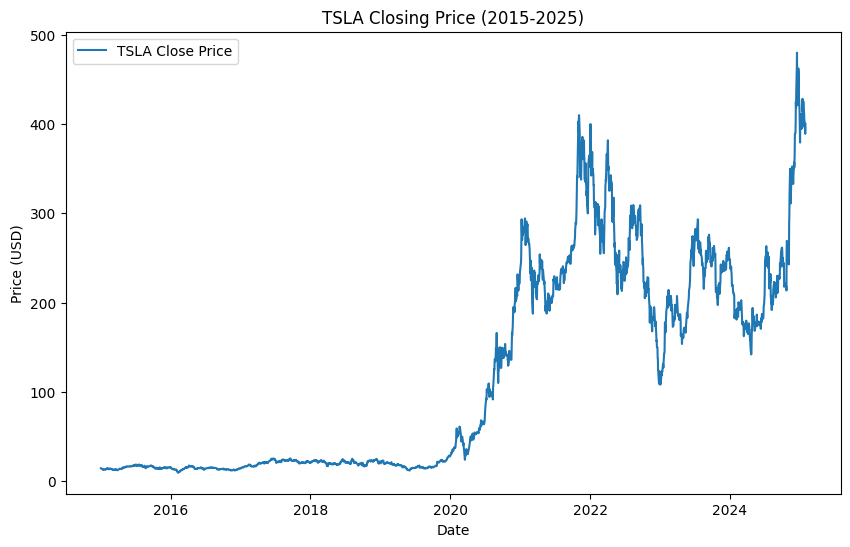

In [20]:
# Exploratory Data Analysis
# Visualize trends, volatility, and decompose the time series
import os

# Create reports directory if it doesn't exist
if not os.path.exists('../reports'):
    os.makedirs('../reports')
print("\nPerforming EDA...")
for ticker in tickers:
    print(f"Generating plots for {ticker}...")
    plot_closing_price(cleaned_data[ticker], ticker)
    plot_volatility(cleaned_data[ticker], ticker, window=30)
    decompose_series(cleaned_data[ticker], ticker)

# Insights
print("\nKey Insights:")
print("- TSLA: High volatility, strong upward trend.")
print("- BND: Stable with minimal fluctuations.")
print("- SPY: Moderate growth, reflecting market trends.")
print("Plots are saved in reports/.")